In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(f'train size: {train_df.shape}')
print(f'test size: {test_df.shape}')

train size: (1460, 81)
test size: (1459, 80)


SalePrice's skew: 1.8828757597682129
SalePrice's kurt: 6.536281860064529


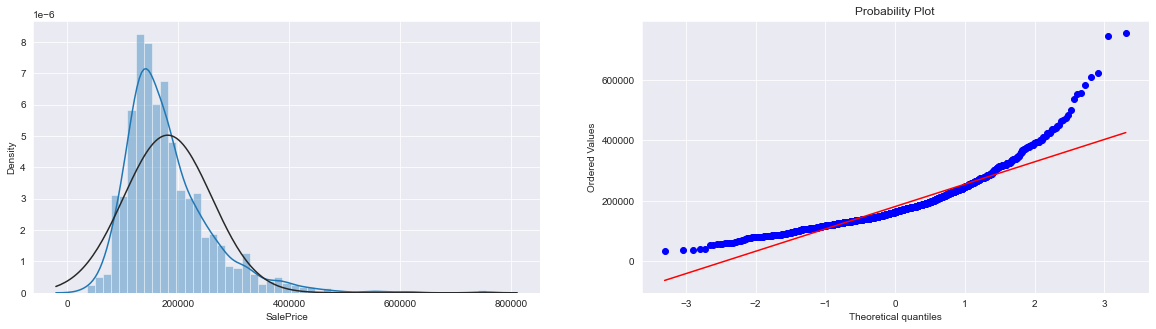

In [7]:
print(f"SalePrice's skew: {train_df.SalePrice.skew()}")
print(f"SalePrice's kurt: {train_df.SalePrice.kurt()}")
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(train_df.SalePrice, fit=norm, ax=ax[0])
probplot(train_df.SalePrice, plot=ax[1])
plt.show()

In [19]:
print(f"SalePrice'missing count: {train.SalePrice.isnull().sum()}")

SalePrice'missing count: 0


In [20]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [21]:
common = pd.concat([train, test], axis = 0)

In [22]:
common

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [23]:
def missing_val(data):
  for col in data.columns:
    if(data[col].isnull().sum()!=0):
       missing=data[col].isna().sum()
       print(f"{col: <{20}} {missing}")
missing_val(common)

MSZoning             4
LotFrontage          486
Alley                2721
Utilities            2
Exterior1st          1
Exterior2nd          1
MasVnrType           24
MasVnrArea           23
BsmtQual             81
BsmtCond             82
BsmtExposure         82
BsmtFinType1         79
BsmtFinSF1           1
BsmtFinType2         80
BsmtFinSF2           1
BsmtUnfSF            1
TotalBsmtSF          1
Electrical           1
BsmtFullBath         2
BsmtHalfBath         2
KitchenQual          1
Functional           2
FireplaceQu          1420
GarageType           157
GarageYrBlt          159
GarageFinish         159
GarageCars           1
GarageArea           1
GarageQual           159
GarageCond           159
PoolQC               2909
Fence                2348
MiscFeature          2814
SaleType             1
SalePrice            1459


In [24]:
common.drop(['MiscFeature','Fence','PoolQC',
                        'Alley'],axis=1, inplace=True);

In [25]:
common.shape

(2919, 77)

In [26]:
common.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [27]:
col_with_zero_value=['BsmtFinSF2','LowQualFinSF','BsmtHalfBath',
                     'EnclosedPorch','3SsnPorch','ScreenPorch',
                     'PoolArea','MiscVal']

common.drop(col_with_zero_value,axis=1,inplace=True)

<AxesSubplot:>

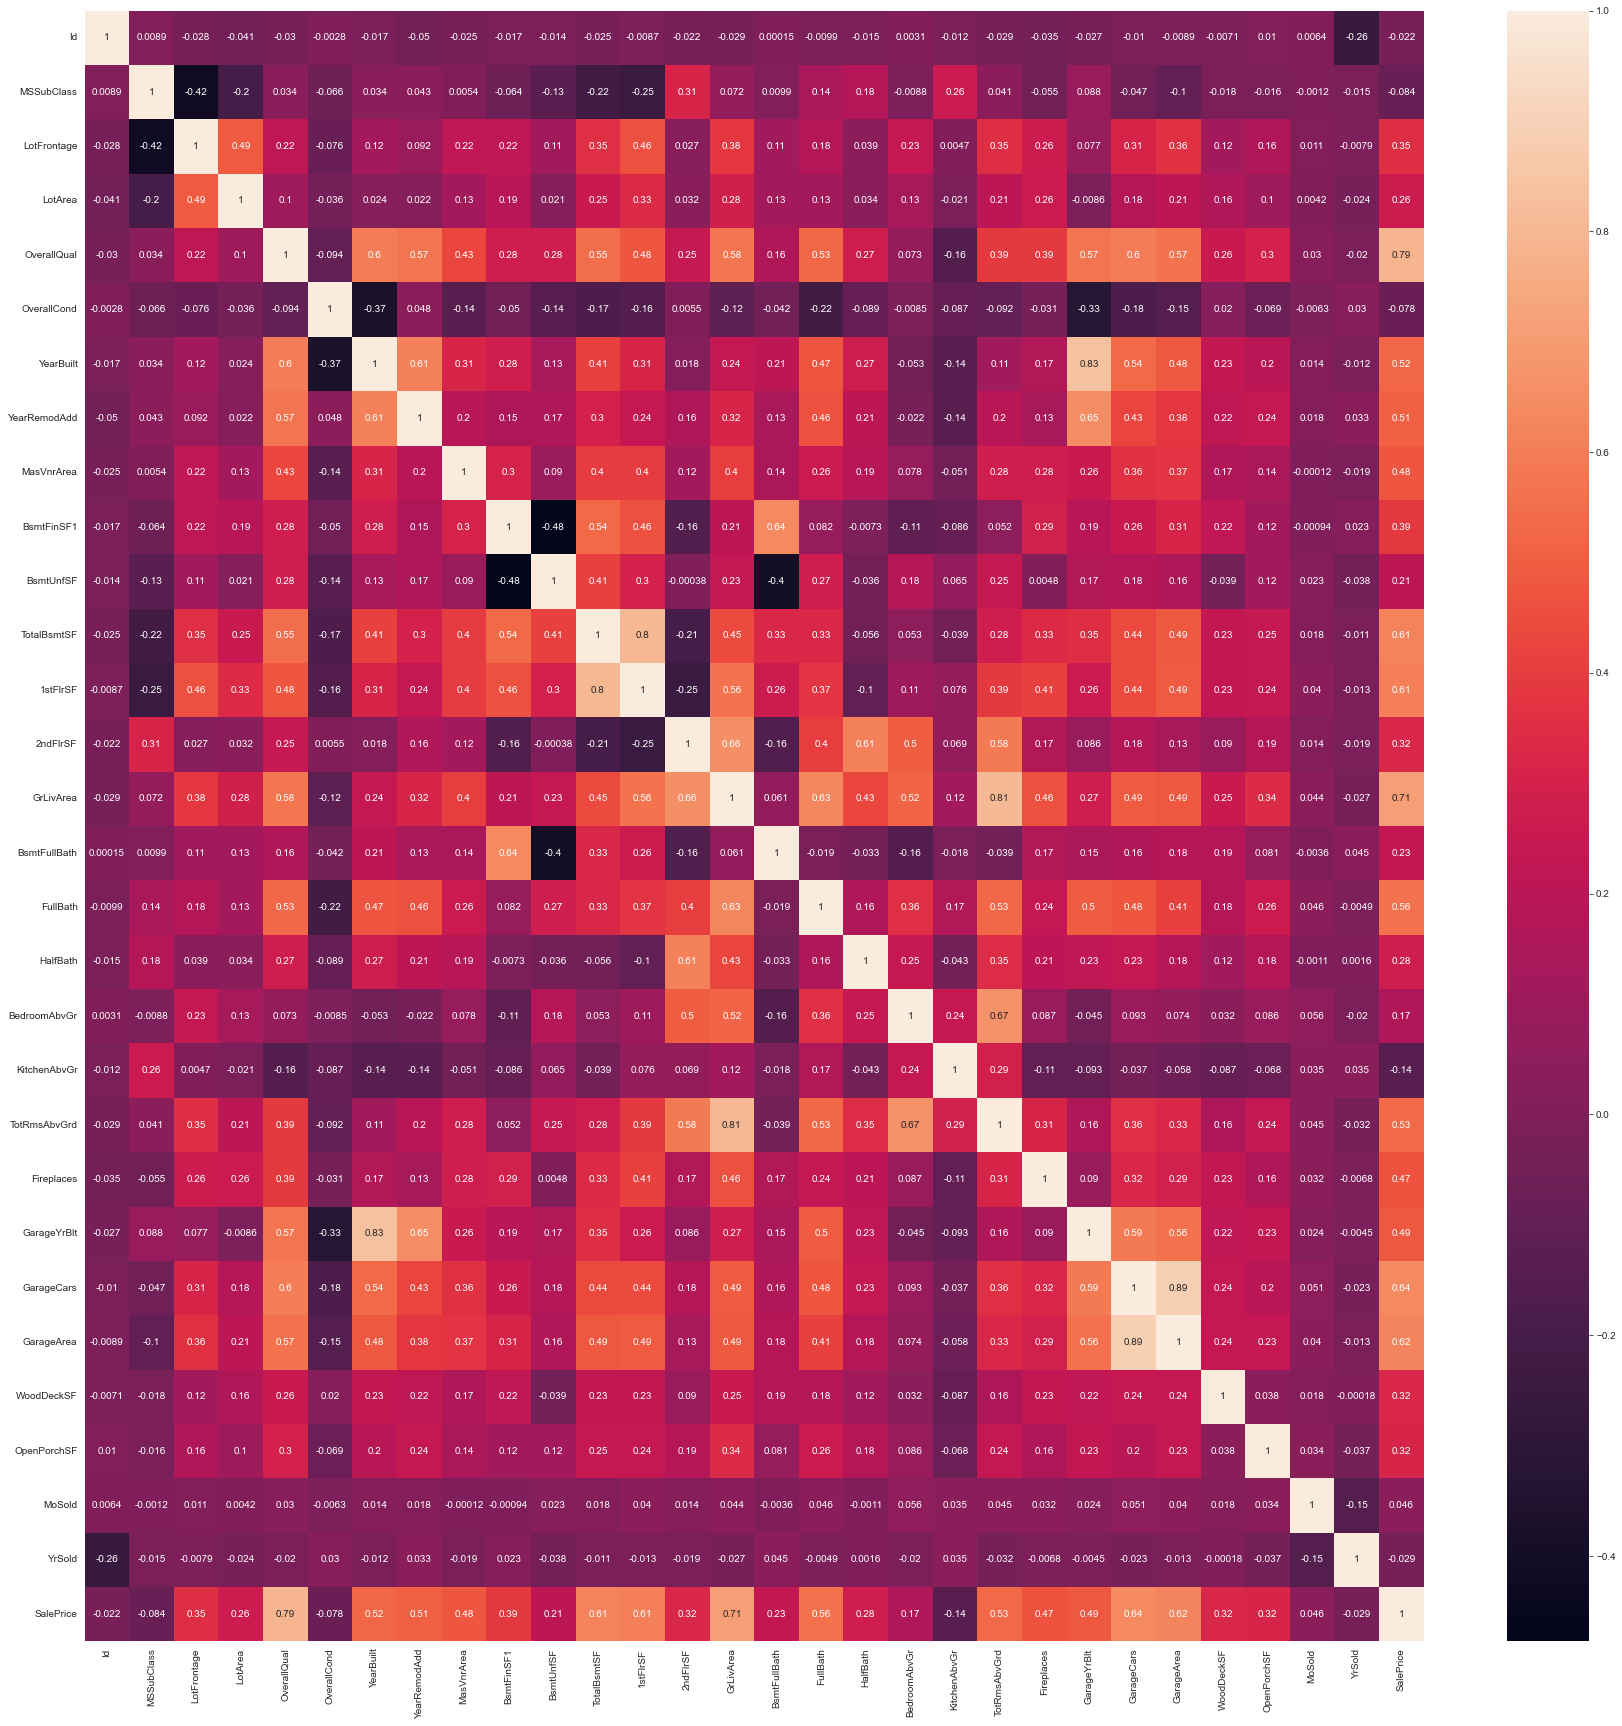

In [28]:
fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(common.corr(), annot=True)

In [29]:
com=common.drop(['GarageCars'],axis=1)

In [46]:
num_col = []
cat_col = []
for col in com.columns:
  if(com[col].dtype == "object"):
    cat_col.append(col)
  else:
    num_col.append(col)

In [47]:
print(num_col)
print(cat_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [48]:
com[num_col].isna().sum()

Id              0
MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

In [49]:
for col in num_col:
  if(com[col].isnull().sum() != 0):
    com[col].fillna(com[col].mean(), inplace=True)

In [50]:
com[cat_col].isna().sum()

MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64

In [51]:
com['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [56]:
com['FireplaceQu'].mode()

0    Gd
dtype: object

In [55]:
com['FireplaceQu'].mode()[0]

'Gd'

In [59]:
for col in cat_col:
    if com[col].isnull().sum!=0:
        com[col]=com[col].fillna(com[col].mode()[0])

In [60]:
com[cat_col].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [64]:
num_data = com[num_col]
scaler = StandardScaler()
scaledData = scaler.fit_transform(num_data)

In [73]:
scaled_num_data = pd.DataFrame(scaledData, columns=num_col)
scal_num_data=scaled_num_data.drop(['Id','SalePrice'],axis=1)

In [74]:
scal_num_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,0.067331,-0.202068,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.580907,-0.934863,...,0.169927,-0.207698,0.986849,-0.924311,1.000929,0.348900,-0.740760,0.200006,-1.552184,0.157646
1,-0.873616,0.501870,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178112,-0.629896,...,0.169927,-0.207698,-0.287758,0.623632,-0.085000,-0.059792,1.614879,-0.702843,-0.446925,-0.602962
2,0.067331,-0.061280,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.097873,-0.288516,...,0.169927,-0.207698,-0.287758,0.623632,0.920490,0.627553,-0.740760,-0.081209,1.026753,0.157646
3,0.302568,-0.436714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572250,-0.494941,-0.047275,...,0.169927,-0.207698,0.349546,0.623632,0.799831,0.785457,-0.740760,-0.184815,-1.552184,-1.363569
4,0.067331,0.689587,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387486,0.468931,-0.161068,...,1.385655,-0.207698,1.624153,0.623632,0.880270,1.686437,0.776967,0.540424,2.132012,0.157646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.419700,-2.266952,-1.043937,-1.481920,1.289758,-0.043346,-0.682812,-0.572250,-0.969192,-0.033619,...,0.169927,-0.207698,-0.925062,-0.924311,0.000000,-2.196138,-0.740760,-0.702843,-0.078505,-1.363569
2915,2.419700,-2.266952,-1.049263,-1.481920,-0.507284,-0.043346,-0.682812,-0.572250,-0.415899,-0.607138,...,0.169927,-0.207698,-0.287758,-0.924311,-0.326318,-0.867888,-0.740760,-0.347624,-0.815344,-1.363569
2916,-0.873616,4.256207,1.246808,-0.772552,1.289758,-0.373528,0.561757,-0.572250,1.718232,-1.276243,...,1.385655,-0.207698,0.349546,0.623632,-0.728514,0.478938,3.006130,-0.702843,1.026753,-1.363569
2917,0.655424,-0.342855,0.034605,-0.772552,-0.507284,0.683057,0.370284,-0.572250,-0.229272,0.032381,...,0.169927,-0.207698,-0.287758,-0.924311,0.000000,-2.196138,-0.108374,-0.229217,0.289914,-1.363569


In [77]:
for col in cat_col:
    print(com[col].value_counts())
    print("___"*10)


RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
______________________________
Pave    2907
Grvl      12
Name: Street, dtype: int64
______________________________
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
______________________________
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
______________________________
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
______________________________
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
______________________________
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
______________________________
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoR

In [87]:
cat_data = com[cat_col]
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc_cat = encoder.fit_transform(cat_data)

In [88]:
enc_cat = pd.DataFrame(enc_cat)

In [89]:
enc_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
com = pd.concat([scal_num_data, enc_cat], axis = 1)

In [91]:
com.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,229,230,231,232,233,234,235,236,237,238
0,0.067331,-0.202068,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.580907,-0.934863,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.873616,0.501870,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178112,-0.629896,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.067331,-0.061280,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.097873,-0.288516,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.302568,-0.436714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572250,-0.494941,-0.047275,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.067331,0.689587,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387486,0.468931,-0.161068,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [94]:
train=com.iloc[0:1460,:]
test=com.iloc[1460:,:]

In [105]:
len(num_col)

29

In [106]:
len(cat_col)

39

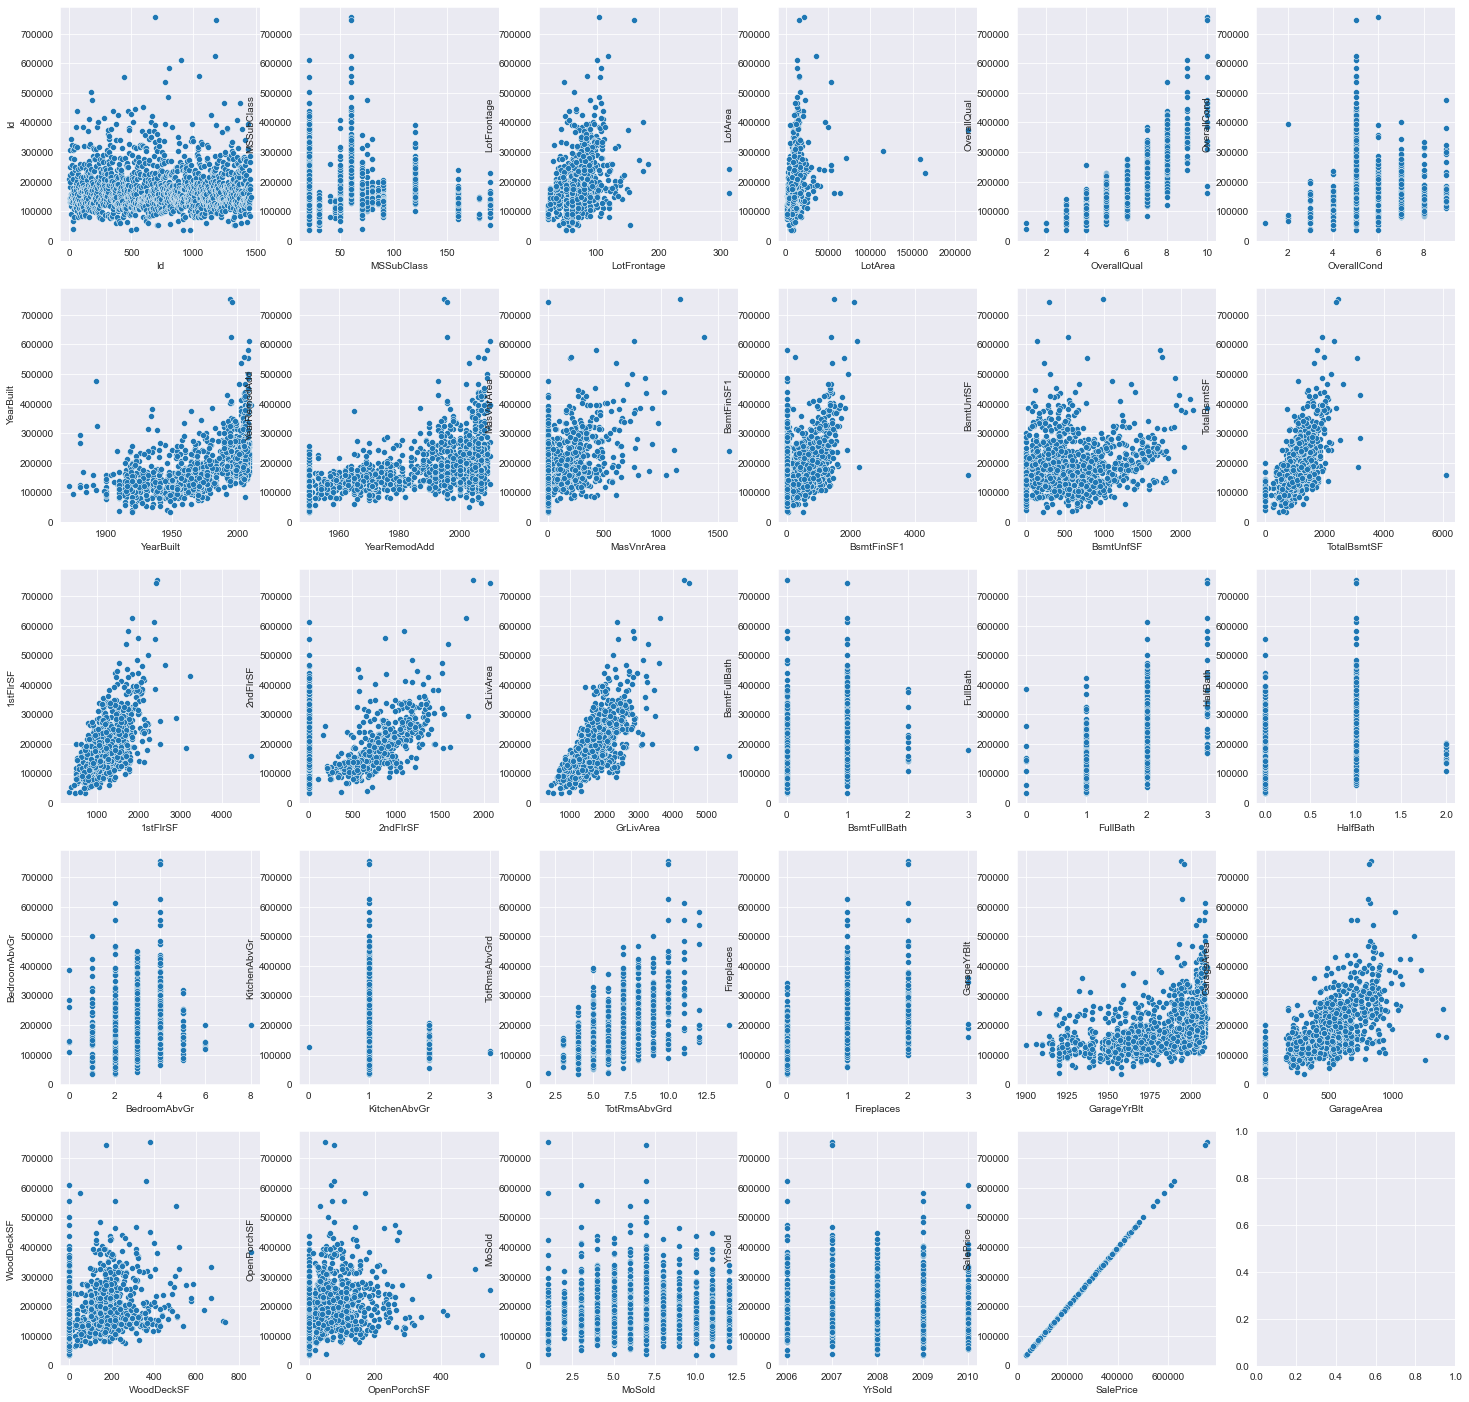

In [98]:
fig, ax = plt.subplots(5,6,figsize=(25,25))
ax=ax.flatten()
for i, col in enumerate(num_col):
    sns.scatterplot(y='SalePrice', x=col, ax=ax[i], data=train_df)
    ax[i].set_ylabel(col)
plt.show()

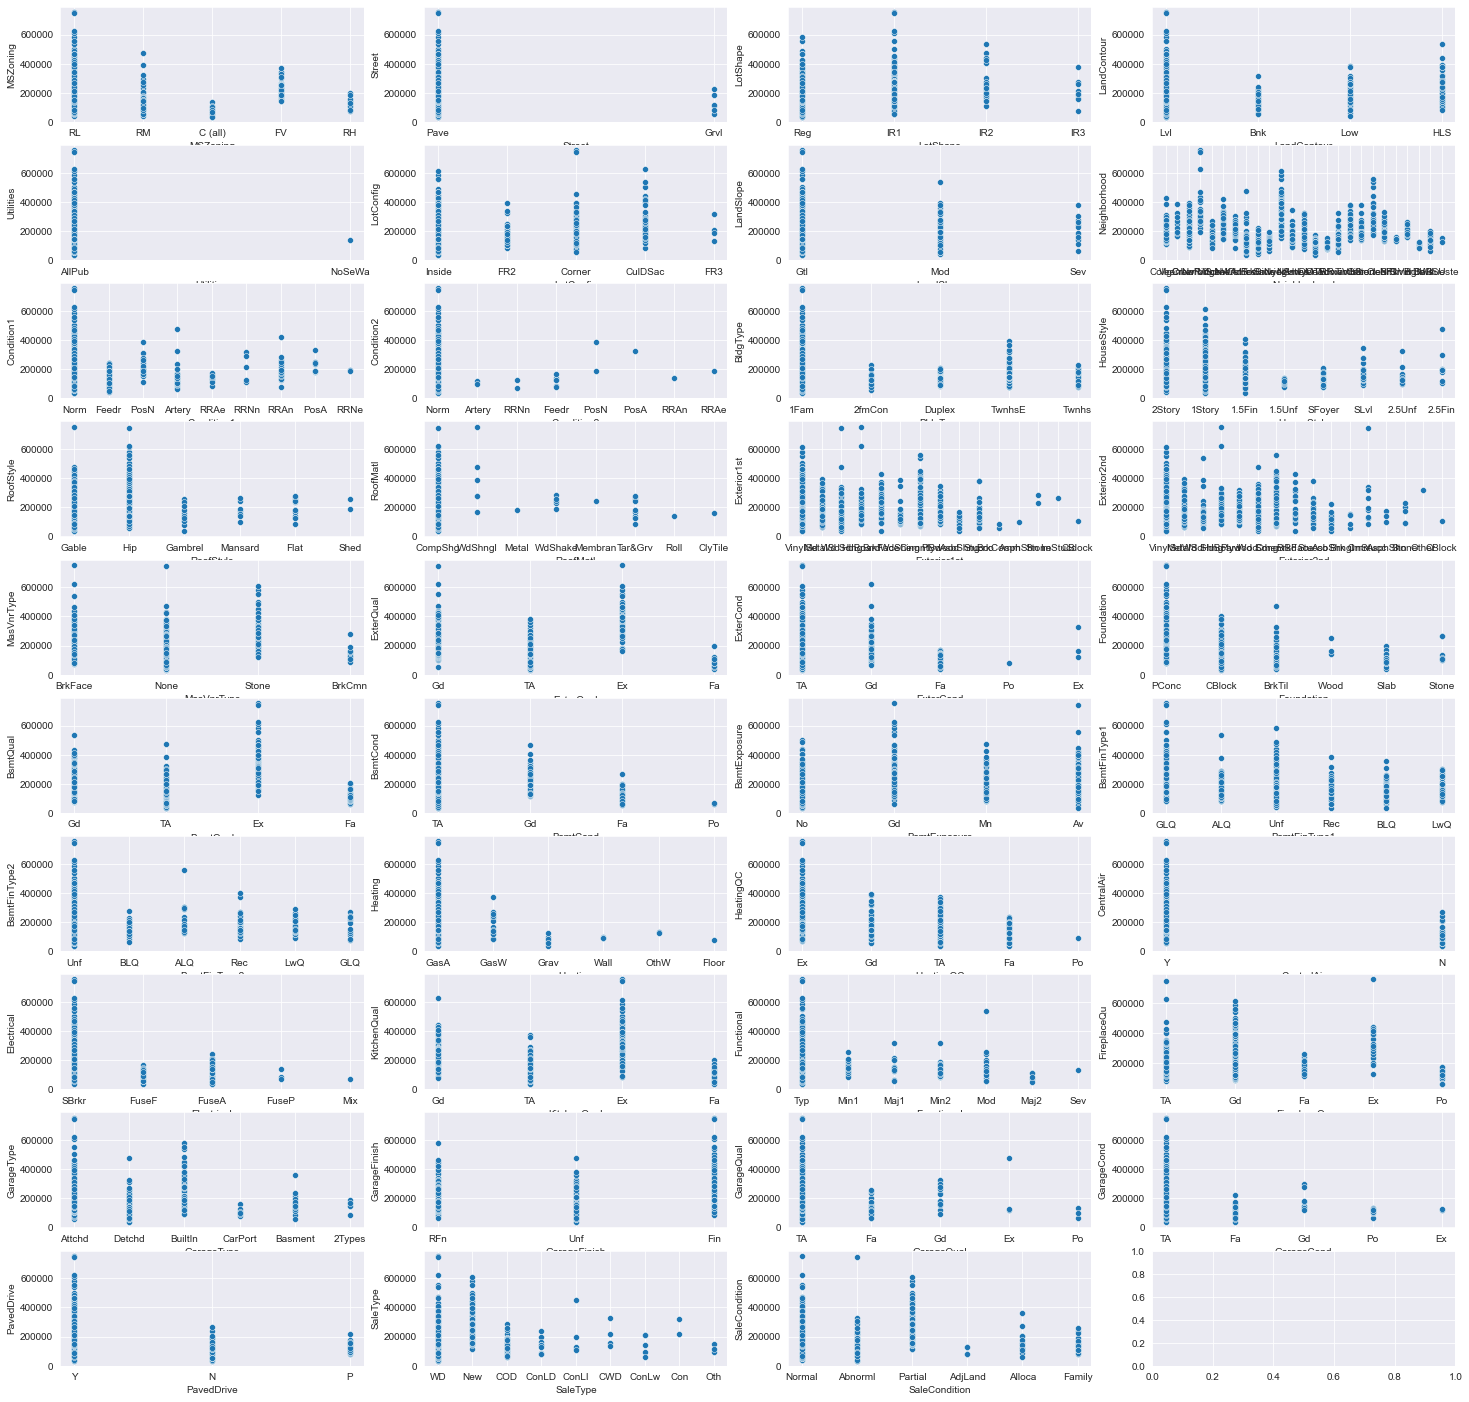

In [107]:
fig, ax = plt.subplots(10,4,figsize=(25,25))
ax=ax.flatten()
for i, col in enumerate(cat_col):
    sns.scatterplot(y='SalePrice', x=col, ax=ax[i], data=train_df)
    ax[i].set_ylabel(col)
plt.show()

In [108]:
y=train_df['SalePrice']
X=train

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
LR_model=LinearRegression(n_jobs=-1)   
# KNN_model=KNeighborsRegressor(n_neighbors=8)
# DT_model=DecisionTreeRegressor(random_state=1)
# xg_model=xgb.XGBRegressor(learning_rate=.1,booster='dart')

In [144]:
LR_model.fit(X_train, y_train)
LR_model.score(X_test, y_test)

-1.7539957271214163e+17

In [211]:
RF_model=RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=45)
RF_model.fit(X_train, y_train)
RF_model.score(X_test, y_test)

0.8892216549313798

In [146]:
from sklearn.model_selection import cross_val_score

In [152]:
scores = cross_val_score(RF_model, X, y, cv=5)

In [153]:
scores

array([0.87118143, 0.8558359 , 0.86887567, 0.88186739, 0.78911726])

In [155]:
test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,229,230,231,232,233,234,235,236,237,238
1460,-0.873616,0.501870,0.184371,-0.772552,0.391237,-0.340510,-1.113625,-0.572250,0.058352,-0.661759,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1461,-0.873616,0.548800,0.519791,-0.063185,0.391237,-0.439565,-1.257229,0.032468,1.057354,-0.352241,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1462,0.067331,0.220295,0.464374,-0.772552,-0.507284,0.848148,0.657493,-0.572250,0.767534,-0.964449,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1463,0.067331,0.408012,-0.024109,-0.063185,0.391237,0.881166,0.657493,-0.460265,0.352564,-0.538862,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1464,1.478753,-1.234510,-0.654748,1.355551,-0.507284,0.683057,0.370284,-0.572250,-0.391747,1.038314,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.419700,-2.266952,-1.043937,-1.481920,1.289758,-0.043346,-0.682812,-0.572250,-0.969192,-0.033619,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,2.419700,-2.266952,-1.049263,-1.481920,-0.507284,-0.043346,-0.682812,-0.572250,-0.415899,-0.607138,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,-0.873616,4.256207,1.246808,-0.772552,1.289758,-0.373528,0.561757,-0.572250,1.718232,-1.276243,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.655424,-0.342855,0.034605,-0.772552,-0.507284,0.683057,0.370284,-0.572250,-0.229272,0.032381,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [200]:
res = RF_model.predict(test)

In [207]:
submission = pd.DataFrame({'Id' : test_df['Id'], 'SalePrice' : res})

In [208]:
submission

,Id,SalePrice
0,1461,127762.250
1,1462,154623.750
2,1463,179864.965
3,1464,185924.000
4,1465,204173.695
...,...,...
1454,2915,89123.625
1455,2916,91156.500
1456,2917,158274.240
1457,2918,118613.500


In [209]:
submission.to_csv("submission1.csv", index=None)

In [212]:
!jupyter trust housePricingKaggle.ipynb

Signing notebook: housePricingKaggle.ipynb
